In [1]:
%pip install librosa soundfile numpy pandas scikit-learn matplotlib seaborn tqdm --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [5]:
DATA_PATH = r"D:\DEEPFAKE_PROJECT\SER_Project\data\audio_speech_actors_01-24"
# Kiểm tra số lượng thư mục diễn viên (Actor)
actors = [d for d in os.listdir(DATA_PATH) if d.startswith("Actor_")]
print(f"✅ Tổng số thư mục diễn viên: {len(actors)}")

✅ Tổng số thư mục diễn viên: 24


In [6]:
sample_actor = os.path.join(DATA_PATH, "Actor_01")
sample_files = os.listdir(sample_actor)[:5]
print("🔹 Một vài file mẫu:", sample_files)

🔹 Một vài file mẫu: ['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav']


In [7]:
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def get_emotion_from_filename(filename):
    part = filename.split('-')[2]  # lấy phần thứ 3
    return emotion_dict.get(part, 'unknown')

# Kiểm tra thử
for f in sample_files:
    print(f"{f}  →  {get_emotion_from_filename(f)}")

03-01-01-01-01-01-01.wav  →  neutral
03-01-01-01-01-02-01.wav  →  neutral
03-01-01-01-02-01-01.wav  →  neutral
03-01-01-01-02-02-01.wav  →  neutral
03-01-02-01-01-01-01.wav  →  calm


In [8]:
data = []
for actor in tqdm(actors):
    actor_path = os.path.join(DATA_PATH, actor)
    for file in os.listdir(actor_path):
        if file.endswith('.wav'):
            emotion = get_emotion_from_filename(file)
            file_path = os.path.join(actor_path, file)
            data.append([file_path, emotion])

df = pd.DataFrame(data, columns=['path', 'emotion'])
print("✅ Tổng số file:", len(df))
df.head()

100%|██████████| 24/24 [00:00<00:00, 657.97it/s]


✅ Tổng số file: 1440


,path,emotion
0,D:\DEEPFAKE_PROJECT\SER_Project\data\audio_spe...,neutral
1,D:\DEEPFAKE_PROJECT\SER_Project\data\audio_spe...,neutral
2,D:\DEEPFAKE_PROJECT\SER_Project\data\audio_spe...,neutral
3,D:\DEEPFAKE_PROJECT\SER_Project\data\audio_spe...,neutral
4,D:\DEEPFAKE_PROJECT\SER_Project\data\audio_spe...,calm


C:\Users\Asus\AppData\Local\Temp\ipykernel_14876\3656652962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='viridis')
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


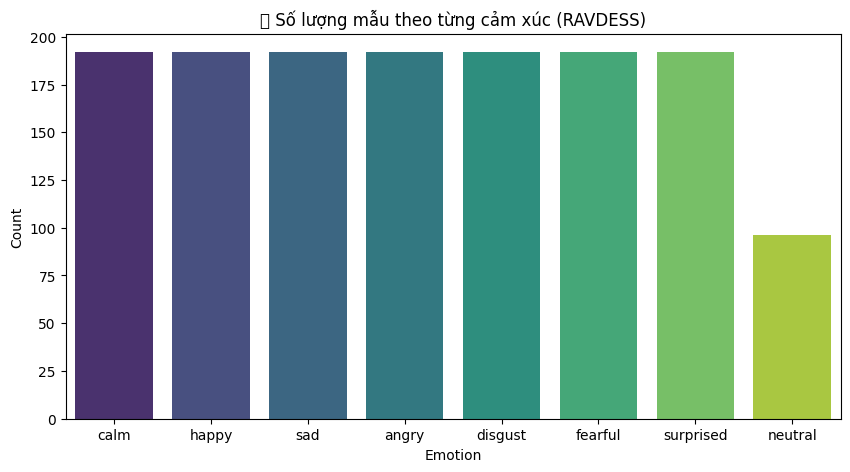

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='viridis')
plt.title("📊 Số lượng mẫu theo từng cảm xúc (RAVDESS)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

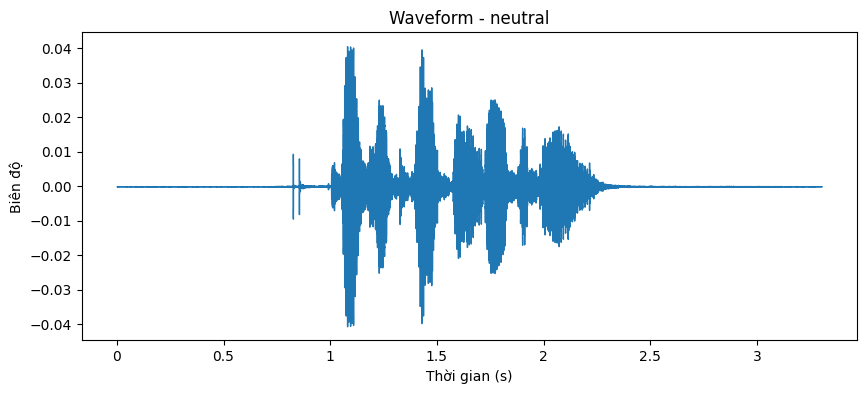

🎵 File: 03-01-01-01-01-01-01.wav
📈 Sampling Rate: 48000 Hz
🕒 Độ dài: 3.3 giây


In [10]:
file_path = df.iloc[0]['path']
emotion = df.iloc[0]['emotion']

y, sr = librosa.load(file_path, sr=None)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {emotion}")
plt.xlabel("Thời gian (s)")
plt.ylabel("Biên độ")
plt.show()

print(f" File: {os.path.basename(file_path)}")
print(f" Sampling Rate: {sr} Hz")
print(f" Độ dài: {round(len(y)/sr, 2)} giây")